In [36]:
import pandas as pd
import mpld3, mpld3.plugins as plugins

In [5]:
data=pd.read_csv('db/data.csv')

In [6]:
data

,timestamp,name,contactno,address,city,pincode,state,latitude,longitude
0,1,1,1,1,1,1,1,0.00000,0.00000
1,10:52.,vetriselvi,9750814875,"15,saraswathi plots,Officers colony 3rd street...",Chennai,600116,tamil nadu,13.03584,80.15884
2,11:07.,varshini,9840841496,"no 3b, kaliamman koil road",chennai,600092,tamil nadu,13.06127,80.25577
3,2018-10-31 11:15:10.623166,Imaya,9840754812,"no 9, masudi colony, 13th street",Chennai,600032,tamil nadu,12.99994,80.20867
4,2018-10-31 11:17:49.400305,Jerin,9840754812,"no 29, ramakrishna mutt road",Chennai,600028,tamil nadu,13.03230,80.26753


In [7]:
def saveusrdata(val):
	data=pd.read_csv('db/data.csv')
	data_copy=data.copy()
	n=list(data.columns)
	print(n)
	print(val)
	a=[[],[],[],[],[],[]]
	for i in range(len(val)):
		a[i]=list(data_copy[n[i]])
		a[i].append(val[i])
# 		data_copy[n[i]]=a
		print(n[i],val[i])
	sub=pd.DataFrame({n[0]:a[0],n[1]:a[1],n[2]:a[2],n[3]:a[3],n[4]:a[4],n[5]:a[5]})    
	sub.to_csv('db/data.csv',index=False)
	return "done"

In [8]:
b=saveusrdata(val=['5','5','5','5','5','5'])
if(b=="done"):
    print("render_template('userdetails.html')")
else:
    print("error")

['timestamp', 'name', 'contactno', 'address', 'city', 'pincode', 'state', 'latitude', 'longitude']
['5', '5', '5', '5', '5', '5']
timestamp 5
name 5
contactno 5
address 5
city 5
pincode 5
render_template('userdetails.html')


In [39]:
import requests
import json
# import responses

api_token = 'oyq2afLK8q9KJG8yDiojI3gldjCBkkN0'

# api = 'https://api.tomtom.com/map/1/staticimage?layer=basic&style=main&format=png&center=4.899886%2C%2052.379031&width=512&height=512&view=Unified&key=oyq2afLK8q9KJG8yDiojI3gldjCBkkN0'

# tomtomgeo = 'https://api.tomtom.com/search/2/geocode/4 north 5th street san jose.json?countrySet=IN&lat=20.5937&lon=78.9629&topLeft=37.553%2C-122.453&btmRight=37.4%2C-122.55&key=oyq2afLK8q9KJG8yDiojI3gldjCBkkN0'

tomtomgeo = 'https://api.tomtom.com/search/2/geocode/ perungudi garbage dump yard chennai,600096.json?countrySet=IN&lat=20.5937&lon=78.9629&key=oyq2afLK8q9KJG8yDiojI3gldjCBkkN0'

# tomtomrevgeo = 'https://api.tomtom.com/search/2/reverseGeocode/13.05116,80.26805.json?key=oyq2afLK8q9KJG8yDiojI3gldjCBkkN0'

req = requests.get(tomtomgeo)

req.status_code

req.json()

{'summary': {'query': 'perungudi garbage dump yard chennai 600096',
  'queryType': 'NON_NEAR',
  'queryTime': 13,
  'numResults': 8,
  'offset': 0,
  'totalResults': 11,
  'fuzzyLevel': 2,
  'geoBias': {'lat': 20.5937, 'lon': 78.9629}},
 'results': [{'type': 'Geography',
   'id': 'IN/GEO/p0/361078',
   'score': 2.341,
   'dist': 860086.0791101672,
   'entityType': 'PostalCodeArea',
   'address': {'municipalitySubdivision': 'Perungudi, Workers Estate, Vettuvankeni, Venkateswara Nagar, Venkatesa Ngar, Veera Vanchinathan Nagar, Vasudeva Nagar, Vannanturai, Valmiki Nagar, VS Industrial Estate, VGP Layout, VGB Golden Beach, Tiruvanmiyurkuppam, Tirumalai Nagar Annexe, Tirumalai Nagar, Thiruvengadam Nagar, Thiruvanmiyur, Thiruvalluvar Nagar, Telephone Nagar, Teachers Colony, Swaminathan Nagar, Subramaniam Colony, Subbarayan Nagar, Srinivasapuram, Shanti Nagar, Senthil Nagar, Seevaram, Saraswati Nagar, Sangam Colony, Sakti Vinayakar Nagar, Sakathimorthamman Nagar, Ramappa Nagar, Rajiv Nagar, R

In [40]:
a=req.json()
lat=a['results'][0]['position']['lat']
lon=a['results'][0]['position']['lon']
print(lat,lon)

12.95832 80.25608


In [11]:
from math import sin, cos, sqrt, atan2, radians
R = 6373.0
lat1 = radians(13.05116)
lon1 = radians(80.26808)
lat2 = radians(13.03193)
lon2 = radians(80.15408)
dlon = lon2 - lon1
dlat = lat2 - lat1
a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))
distance = R * c
print("Result:", distance)

Result: 12.536948932344727


In [12]:
# data['name'][0]

13.05374	80.22596
13.18482	80.30737
13.11297	80.25123
19.87651	75.35496

In [13]:
from math import sin, cos, sqrt, atan2, radians


def km(lat1,lon1,lat2,lon2):
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    distance=round(distance,2)
#     print("Result:", distance)
    return distance

In [14]:
import tsp

In [48]:
name=['a','b','c','d','e']
lat=[12.95832,13.03584,13.06127,12.99994,13.03230]
lon=[80.25608,80.15884,80.25577,80.20867,80.26753]

In [26]:
a=[]
for i in range(len(name)):
    b=[]
    for j in range(len(name)):
        b.append(name[i]+name[j])
        if(name[j]==name[-1]):
            a.append(b)
            break

In [27]:
a

[['aa', 'ab', 'ac', 'ad', 'ae'],
 ['ba', 'bb', 'bc', 'bd', 'be'],
 ['ca', 'cb', 'cc', 'cd', 'ce'],
 ['da', 'db', 'dc', 'dd', 'de'],
 ['ea', 'eb', 'ec', 'ed', 'ee']]

In [18]:
a1=[]
for i in range(len(lat)):
    b1=[]
    for j in range(len(lat)):
        k=km(lat1=lat[i],lon1=lon[i],lat2=lat[j],lon2=lon[j])
        b1.append(k)
        if(j==len(lat)-1):
            a1.append(b1)
            break

In [19]:
a1
0.0, 13.62, 11.45, 6.92, 8.32

(0.0, 13.62, 11.45, 6.92, 8.32)

In [20]:
r = range(len(a1))
dist = {(i, j): a1[i][j] for i in r for j in r}
print(tsp.tsp(r, dist))
path=tsp.tsp(r, dist)

(36.31, [0, 3, 1, 2, 4])


In [21]:
path[0]+a1[4][0]

44.63

In [22]:
for i in path[1]:
    print(name[i])

a
d
b
c
e


TypeError: 'float' object is not subscriptable

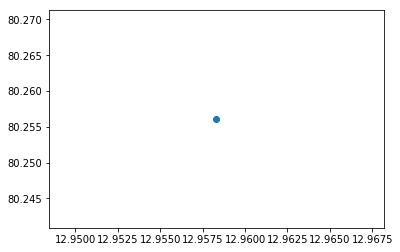

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(lat, lon)
# n=['way-1','way-2','way-3','way-4']

for i, txt in enumerate(name):
    ax.annotate(txt, (lat[i], lon[i]))
for i in range(len(path[1])):
    print(i)
    if(i!=len(path[1])-1):
        ax.plot([lat[int(path[1][i])],lat[int(path[1][i+1])]],[lon[int(path[1][i])],lon[int(path[1][i+1])]])
#         ax.annotate(name[i]+name[i+1],
        a=lat[int(path[1][i])]+lat[int(path[1][i+1])]
        a=a/2
        b=lon[int(path[1][i])]+lon[int(path[1][i+1])]
        b=b/2
        plt.text(a,b,str(i))
#         mpld3.show()
#         break
    else:
        ax.plot([lat[int(path[1][i])],lat[int(path[1][0])]],[lon[int(path[1][i])],lon[int(path[1][0])]])
        a=lat[int(path[1][i])]+lat[int(path[1][0])]
        a=a/2
        b=lon[int(path[1][i])]+lon[int(path[1][0])]
        b=b/2
        plt.text(a,b,str(i))
#         mpld3.show()

In [24]:
lat[int(path[1][i])]/2

6.51615


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [31/Oct/2018 17:56:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Oct/2018 17:56:50] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [31/Oct/2018 17:56:50] code 404, message Not Found
127.0.0.1 - - [31/Oct/2018 17:56:50] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [31/Oct/2018 17:56:50] "GET /mpld3.js HTTP/1.1" 200 -



stopping Server...


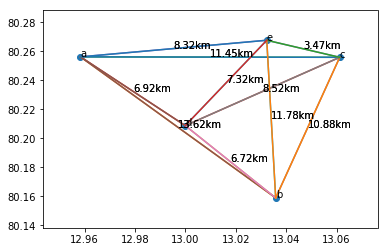

In [38]:
fig, ax = plt.subplots()
ax.scatter(lat, lon)
for i, txt in enumerate(name):
    ax.annotate(txt, (lat[i], lon[i]))
for i in range(len(lat)):
    for j in range(len(lon)):
        ax.plot([lat[i],lat[j]],[lon[i],lon[j]])
        a=lat[i]+lat[j]
        b=lon[i]+lon[j]
        k=km(lat1=lat[i],lon1=lon[i],lat2=lat[j],lon2=lon[j])
        if(k!=0):
            plt.text(a/2,b/2,str(k)+'km')
# mpld3.show()

In [51]:
a=[]
for i in zip(lat,lon):
   a.append(["latitude="+str(i[0]),"longitude="+str(i[1])])
#     a.append(["latitude="+str(i[0]),"longitude="+str(i[1])])

In [52]:
a

[['latitude=12.95832', 'longitude=80.25608'],
 ['latitude=13.03584', 'longitude=80.15884'],
 ['latitude=13.06127', 'longitude=80.25577'],
 ['latitude=12.99994', 'longitude=80.20867'],
 ['latitude=13.0323', 'longitude=80.26753']]